In [82]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import RegularGridInterpolator, CubicSpline

## Fifth-force limits and others

Try to reproduce the fifth-force limits in the light dark matter paper.

In [83]:
fifth_force_lim = np.genfromtxt('./fifth_force_lim_yn.csv', delimiter=',').T
sidm_yx_lim     = np.genfromtxt('./sidm_yx_lim.csv', delimiter=',').T

sidm_yx_lim[0]  = sidm_yx_lim[0] * 1e6  # Convert MeV to eV

Text(0, 0.5, '$y_\\chi$')

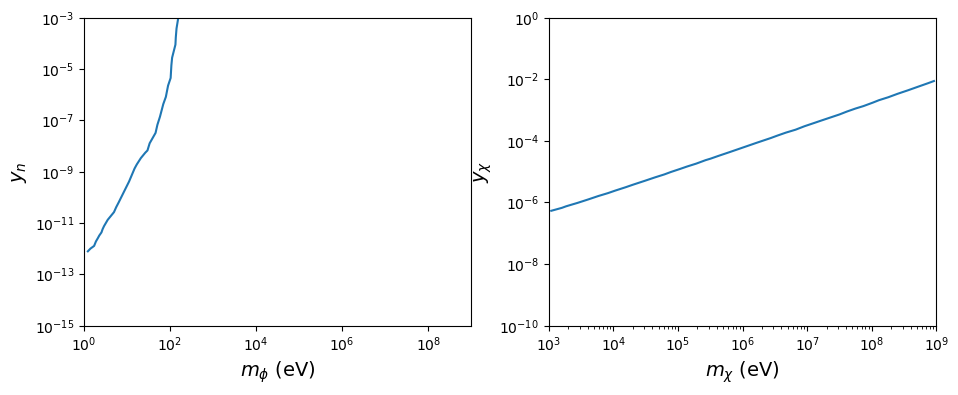

In [84]:
fig, ax = plt.subplots(1, 2, figsize=(11, 4))

ax[0].loglog(fifth_force_lim[0], fifth_force_lim[1])
ax[0].set_ylim(1e-15, 1e-3)
ax[0].set_xlim(1, 1e9)

ax[0].set_xlabel('$m_\phi$ (eV)', fontsize=14)
ax[0].set_ylabel('$y_n$', fontsize=14)

ax[1].loglog(sidm_yx_lim[0], sidm_yx_lim[1])
ax[1].set_ylim(1e-10, 1)
ax[1].set_xlim(1e3, 1e9)

ax[1].set_xlabel('$m_\chi$ (eV)', fontsize=14)
ax[1].set_ylabel('$y_\chi$', fontsize=14)

In [85]:
convert_factor = 0.3894e-27 / 1e-18  # 1 / eV^2 -> cm^2
mn_ev = 939565346 # neutron mass, eV

def get_fifth_force_sigma_n(mx, mphi, yx_lim='SIDM'):
    # Input mx in eV (array-like)
    
    yn   = np.interp(mphi, fifth_force_lim[0], fifth_force_lim[1], right=np.nan)
    
    if yx_lim == 'SIDM':
        yx = np.interp(mx, sidm_yx_lim[0], sidm_yx_lim[1])
    elif yx_lim == 'unity':
        yx = 1
    
    mu_xn = mx * mn_ev / (mx + mn_ev)

    # Cross section in cm^2
    sig_n = convert_factor * yn**2 * yx**2 * mu_xn**2 / (4 * np.pi * (mphi**2 + (1e-3 * mx)**2)**2)
    
    return sig_n

Text(0.5, 1.0, '$m_\\phi = 10^{-3} \\ m_\\chi$, $y_\\chi$ = SIDM')

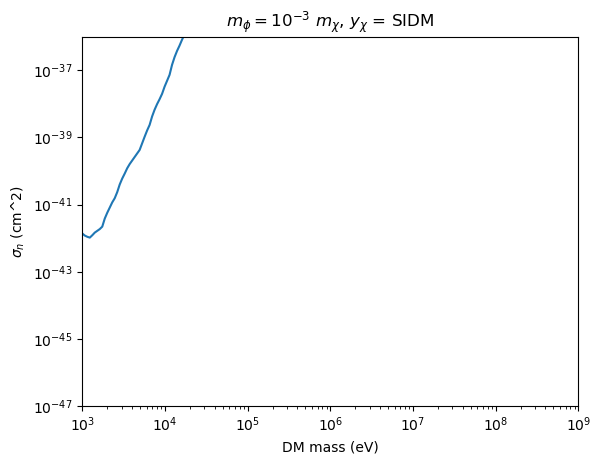

In [86]:
mx = np.logspace(3, 9, 200)
mphi = 1e-3 * mx

sig_n_fifth_force = get_fifth_force_sigma_n(mx, mphi, 'SIDM')

plt.loglog(mx, sig_n_fifth_force)
plt.xlim(1e3, 1e9)
plt.ylim(1e-47, 1e-36)

plt.xlabel('DM mass (eV)')
plt.ylabel('$\sigma_n$ (cm^2)')
plt.title('$m_\phi = 10^{-3} \ m_\chi$, $y_\chi$ = SIDM')

The result plotted here might be problematic because m_phi is not correctly extrapolated to lower values -- however fifth force experiemnts including torsion balance give approximately flat constraints at micron scale. 

Text(0.5, 1.0, '$m_\\phi$ = 10 eV, $y_\\chi = 1$')

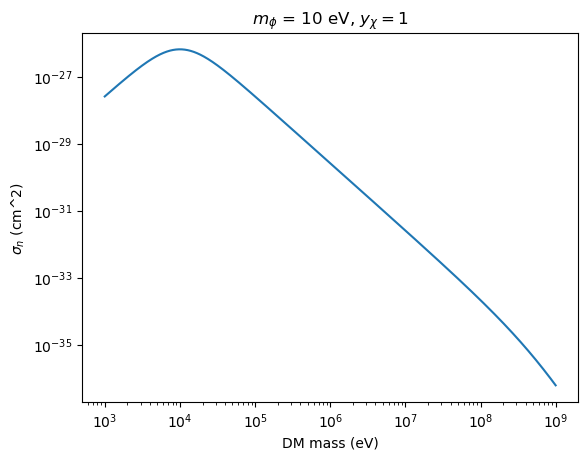

In [87]:
mx = np.logspace(3, 9, 2000)

sig_n_fifth_force = get_fifth_force_sigma_n(mx, 10, 'unity')

plt.loglog(mx, sig_n_fifth_force)

plt.xlabel('DM mass (eV)')
plt.ylabel('$\sigma_n$ (cm^2)')
plt.title('$m_\phi$ = 10 eV, $y_\chi = 1$')

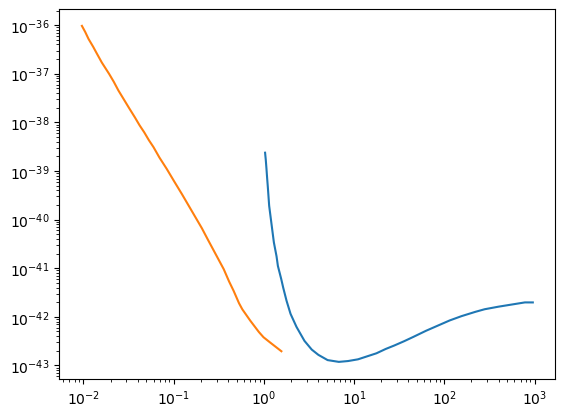

In [98]:
he_nr      = np.genfromtxt('./he_nr_1kgyr.csv', delimiter=',').T
he_2phonon = np.genfromtxt('./he_2_phonon_1kgyr.csv', delimiter=',').T

plt.loglog(he_nr[0], he_nr[1])
plt.loglog(he_2phonon[0], he_2phonon[1])

In [88]:
convert_factor = 0.3894e-27 / 1e-18  # 1 / eV^2 -> cm^2
mn_ev = 949e6        # neutron mass, eV
v_dm = 1e-3

def get_sphere_sigma_n(mx, mphi, yn, yx_lim='unity', yx=None):    
    sig_n = np.empty_like(mx)
    if yx_lim == 'unity':
        yx = 1
    elif yx_lim == 'SIDM':
        yx = np.interp(mx, sidm_yx_lim[0], sidm_yx_lim[1])
        
    mu_xn = mx * mn_ev / (mx + mn_ev)

    # Cross section in cm^2
    sig_n = convert_factor * yn**2 * yx**2 * mu_xn**2 / (4 * np.pi * (mphi**2 + (1e-3 * mx)**2)**2)
    return sig_n

## 100 eV threshold (all directions), Born, 15 nm sphere, 10000 spheres-year

In [89]:
alpha_file = np.load('alpha_n_15nm_100ev_born_1e5sphereyr_alldirs.npz', allow_pickle='True')

mphi = alpha_file['mediator_mass_ev']
mx_gev = alpha_file['mx_gev']
alpha_lim = alpha_file['alpha_n_lim']

yn_limit = alpha_lim * 4 * np.pi / 2

Text(0, 0.5, 'Single neutron coupling $\\alpha_n$')

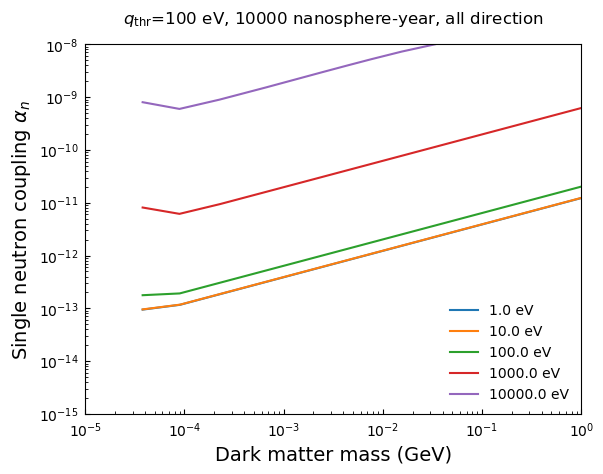

In [90]:
fig, ax = plt.subplots()

for i, lim in enumerate(alpha_lim):
    ax.loglog(mx_gev[i], lim, label=f'{mphi[i]} eV')

ax.set_xlim(1e-5, 1)
ax.set_ylim(1e-15, 1e-8)
ax.tick_params(axis='both', which='both', direction="in", pad=5)

ax.set_title(r'$q_{\mathrm{thr}}$=100 eV, 10000 nanosphere-year, all direction', fontsize=12, pad=15)
ax.legend(frameon=False, fontsize=10)
ax.set_xlabel('Dark matter mass (GeV)', fontsize=14)
ax.set_ylabel(r'Single neutron coupling $\alpha_n$', fontsize=14)

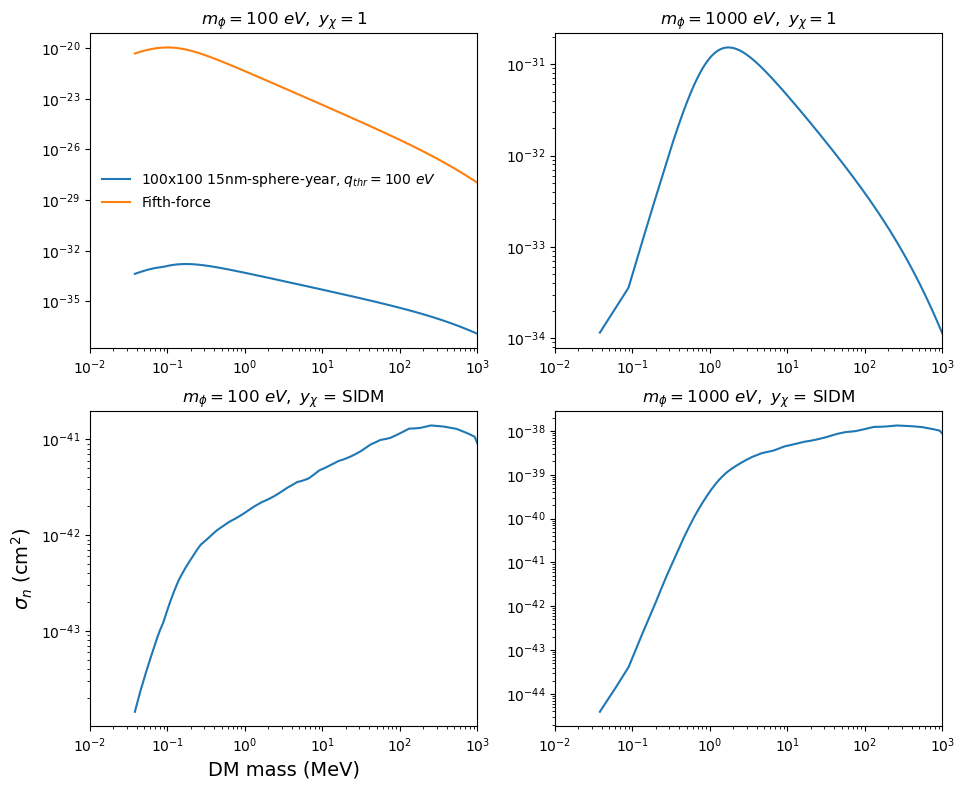

In [91]:
i = 2 # 100 eV
j = 3 # 1000 eV

fig, ax = plt.subplots(2, 2, figsize=(11, 9))

mx_ev = mx_gev[i] * 1e9

ax[0,0].loglog(mx_ev/1e6, get_sphere_sigma_n(mx_ev, mphi[i], yn_limit[i], 'unity'), label=f'100x100 15nm-sphere-year, $q_{{thr}}=100 \ eV$')
ax[0,0].loglog(mx_ev/1e6, get_fifth_force_sigma_n(mx_ev, mphi[i], 'unity'), label='Fifth-force')
ax[0,0].set_title(fr'$m_\phi = {int(mphi[i])} \ eV, \  y_\chi = 1$')
ax[0,0].legend(frameon=False)

ax[0,1].loglog(mx_ev/1e6, get_sphere_sigma_n(mx_ev, mphi[j], yn_limit[j], 'unity'), label=f'100x100 15nm-sphere-year')
ax[0,1].loglog(mx_ev/1e6, get_fifth_force_sigma_n(mx_ev, mphi[j], 'unity'), label='Fifth-force')
ax[0,1].set_title(fr'$m_\phi = {int(mphi[j])} \ eV, \  y_\chi = 1$')

ax[1,0].loglog(mx_ev/1e6, get_sphere_sigma_n(mx_ev, mphi[i], yn_limit[i], 'SIDM'), label=f'100x100 15nm-sphere-year')
ax[1,0].loglog(mx_ev/1e6, get_fifth_force_sigma_n(mx_ev, mphi[j], 'SIDM'), label='Fifth-force')
ax[1,0].set_title(fr'$m_\phi = {int(mphi[i])} \ eV, \  y_\chi$ = SIDM')

ax[1,1].loglog(mx_ev/1e6, get_sphere_sigma_n(mx_ev, mphi[j], yn_limit[j], 'SIDM'), label=f'100x100 15nm-sphere-year')
ax[1,1].loglog(mx_ev/1e6, get_fifth_force_sigma_n(mx_ev, mphi[j], 'SIDM'), label='Fifth-force')
ax[1,1].set_title(fr'$m_\phi = {int(mphi[j])} \ eV, \  y_\chi$ = SIDM')

ax[1,0].set_xlabel('DM mass (MeV)', fontsize=14)
ax[1,0].set_ylabel('$\sigma_n$ ($\mathrm{cm}^2$)', fontsize=14)

for a in ax.flatten():
    a.set_xlim(1e-2, 1e3)


In [92]:
def yn_interp_phi(mphi_interp, mxx, mphi, yn):
    yn_interp = np.empty_like(mxx)
    for i, mx in enumerate(mxx):  
        yn_log = np.interp(mphi_interp[i], mphi, np.log10(yn.T[i]), left=np.log10(yn.T[i][0]), right=np.nan)
        yn_interp[i] = 10**yn_log
    
    return yn_interp

In [93]:
mxx = mx_gev[0] * 1e9
mphi1 = mxx * 1e-3
mphi2 = mxx * 1e-4

yn1 = yn_interp_phi(mphi1, mxx, mphi, yn_limit)
yn2 = yn_interp_phi(mphi2, mxx, mphi, yn_limit)

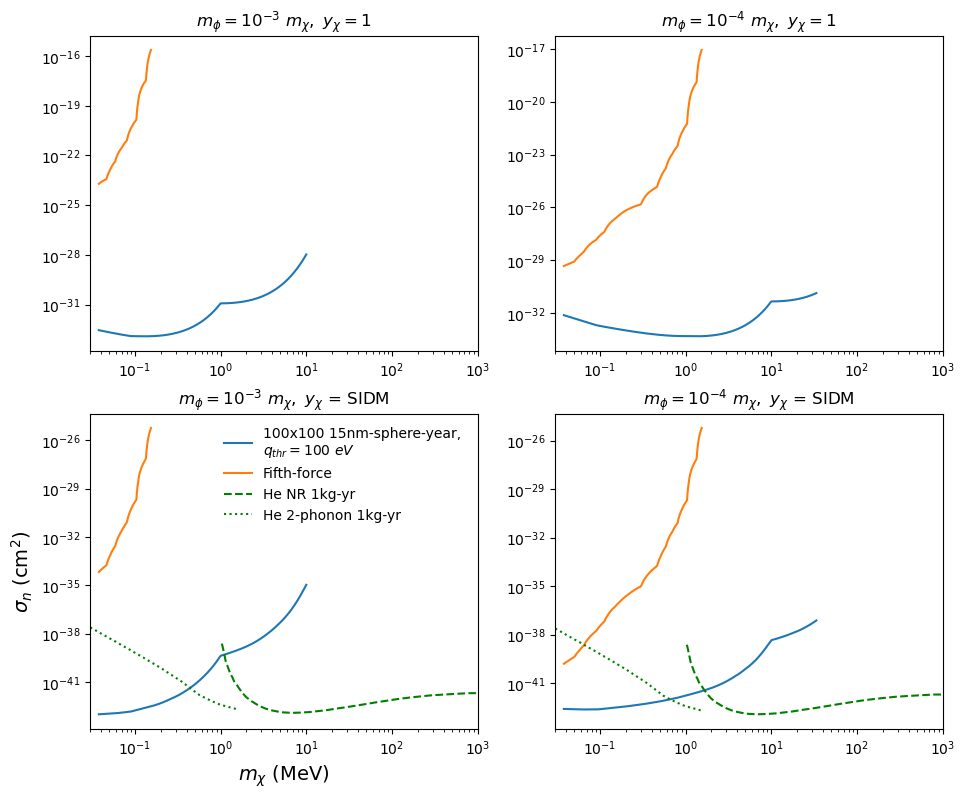

In [108]:
fig, ax = plt.subplots(2, 2, figsize=(11, 9))

mx_ev = mxx

ax[0,0].loglog(mx_ev/1e6, get_sphere_sigma_n(mx_ev, mphi1, yn1, 'unity'), label=f'100x100 15nm-sphere-year')
ax[0,0].loglog(mx_ev/1e6, get_fifth_force_sigma_n(mx_ev, mphi1, 'unity'), label='Fifth-force')
ax[0,0].set_title(fr'$m_\phi = 10^{{-3}} \ m_\chi, \  y_\chi = 1$')

ax[0,1].loglog(mx_ev/1e6, get_sphere_sigma_n(mx_ev, mphi2, yn2, 'unity'), label=f'100x100 15nm-sphere-year')
ax[0,1].loglog(mx_ev/1e6, get_fifth_force_sigma_n(mx_ev, mphi2, 'unity'), label='Fifth-force')
ax[0,1].set_title(fr'$m_\phi = 10^{{-4}} \ m_\chi, \  y_\chi = 1$')

ax[1,0].loglog(mx_ev/1e6, get_sphere_sigma_n(mx_ev, mphi1, yn1, 'SIDM'), label=f'100x100 15nm-sphere-year, \n$q_{{thr}}=100 \ eV$')
ax[1,0].loglog(mx_ev/1e6, get_fifth_force_sigma_n(mx_ev, mphi1, 'SIDM'), label='Fifth-force')
ax[1,0].loglog(he_nr[0], he_nr[1], 'g--', label='He NR 1kg-yr')
ax[1,0].loglog(he_2phonon[0], he_2phonon[1], 'g:', label='He 2-phonon 1kg-yr')

ax[1,0].set_title(fr'$m_\phi = 10^{{-3}} \ m_\chi, \  y_\chi$ = SIDM')
ax[1,0].legend(frameon=False)

ax[1,1].loglog(mx_ev/1e6, get_sphere_sigma_n(mx_ev, mphi2, yn2, 'SIDM'), label=f'100x100 15nm-sphere-year')
ax[1,1].loglog(mx_ev/1e6, get_fifth_force_sigma_n(mx_ev, mphi2, 'SIDM'), label='Fifth-force')
ax[1,1].loglog(he_nr[0], he_nr[1], 'g--', label='He NR 1kg-yr')
ax[1,1].loglog(he_2phonon[0], he_2phonon[1], 'g:', label='He 2-phonon 1kg-yr')

ax[1,1].set_title(fr'$m_\phi = 10^{{-3}} \ m_\chi, \  y_\chi$ = SIDM')
ax[1,1].set_title(fr'$m_\phi = 10^{{-4}} \ m_\chi, \  y_\chi$ = SIDM')

ax[1,0].set_xlabel('$m_\chi$ (MeV)', fontsize=14)
ax[1,0].set_ylabel('$\sigma_n$ ($\mathrm{cm}^2$)', fontsize=14)

for a in ax.flatten():
    a.set_xlim(3e-2, 1e3)


## 100 eV threshold, 15 nm sphere, 1 sphere-month

In [8]:
# This is just a quick estimate, still need to do full calculation
alpha_file = np.load('alpha_n_15nm_100ev_1spheremonth.npz', allow_pickle='True')

mphi = alpha_file['mediator_mass_ev']
mx_gev = alpha_file['mx_gev']
alpha_lim = alpha_file['alpha_n_lim']

In [9]:
yn_limit = alpha_lim * 4 * np.pi / 2

Text(0, 0.5, 'Single neutron coupling $\\alpha_n$')

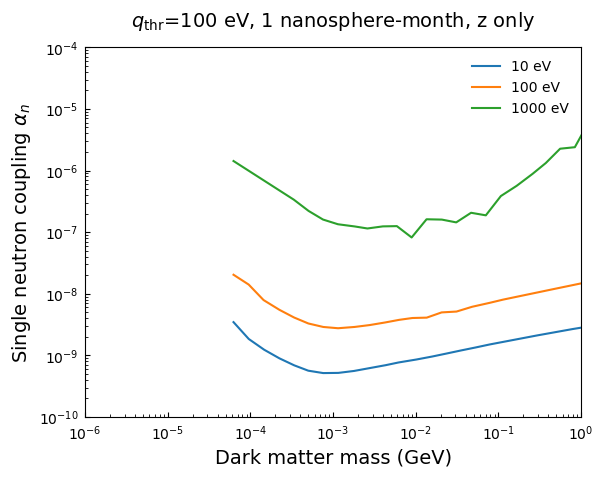

In [10]:
fig, ax = plt.subplots()

for i, lim in enumerate(alpha_lim):
    ax.loglog(mx_gev[i], lim, label=f'{mphi[i]} eV')

ax.set_ylim(1e-10, 1e-4)
ax.set_xlim(1e-6, 1)
ax.tick_params(axis='both', which='both', direction="in", pad=5)

ax.set_title(r'$q_{\mathrm{thr}}$=100 eV, 1 nanosphere-month, z only', fontsize=14, pad=15)
ax.legend(frameon=False, fontsize=10)
ax.set_xlabel('Dark matter mass (GeV)', fontsize=14)
ax.set_ylabel(r'Single neutron coupling $\alpha_n$', fontsize=14)

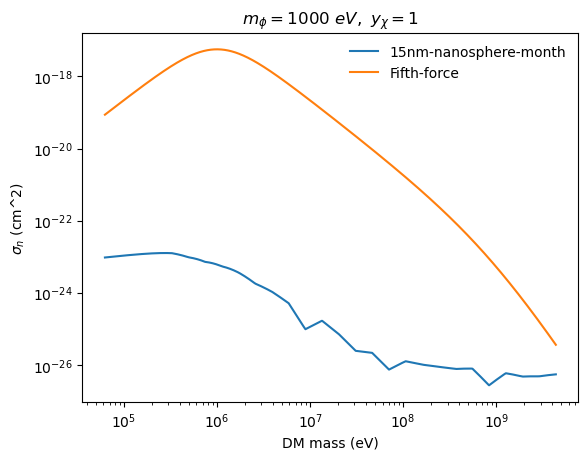

In [30]:
i = 2

mx_ev = mx_gev[i] * 1e9
plt.loglog(mx_ev, get_sphere_sigma_n(mx_ev, mphi[i], yn_limit[i], 'unity'), label=f'15nm-nanosphere-month')
plt.loglog(mx_ev, get_fifth_force_sigma_n(mx_ev, mphi[i], 'unity'), label='Fifth-force')

plt.title(f'$m_\phi = {mphi[i]} \ eV, \  y_\chi = 1$')
plt.xlabel('DM mass (eV)')
plt.ylabel('$\sigma_n$ (cm^2)')
plt.legend(frameon=False)

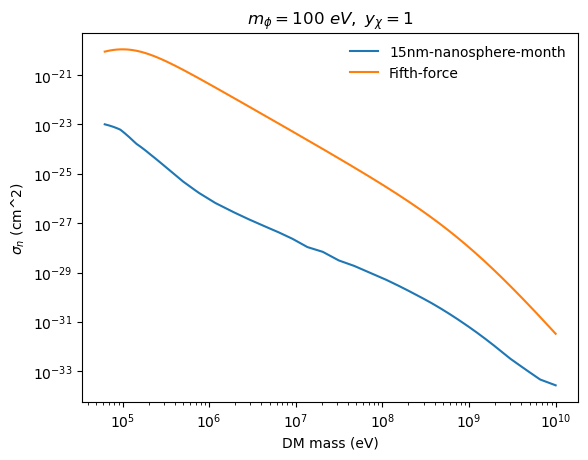

In [29]:
i = 1

mx_ev = mx_gev[i] * 1e9
plt.loglog(mx_ev, get_sphere_sigma_n(mx_ev, mphi[i], yn_limit[i], 'unity'), label=f'15nm-nanosphere-month')
plt.loglog(mx_ev, get_fifth_force_sigma_n(mx_ev, mphi[i], 'unity'), label='Fifth-force')

plt.title(f'$m_\phi = {mphi[i]} \ eV, \  y_\chi = 1$')
plt.xlabel('DM mass (eV)')
plt.ylabel('$\sigma_n$ (cm^2)')
plt.legend(frameon=False)

##  25 keV threshold, 1 nanosphere-month

In [93]:
alpha_file = np.load('alpha_n_25kev_1spheremonth.npz', allow_pickle='True')

mphi = alpha_file['mediator_mass_ev']
mx_gev = alpha_file['mx_gev']
alpha_lim = alpha_file['alpha_n_lim']

Text(0, 0.5, 'Single neutron coupling $\\alpha_n$')

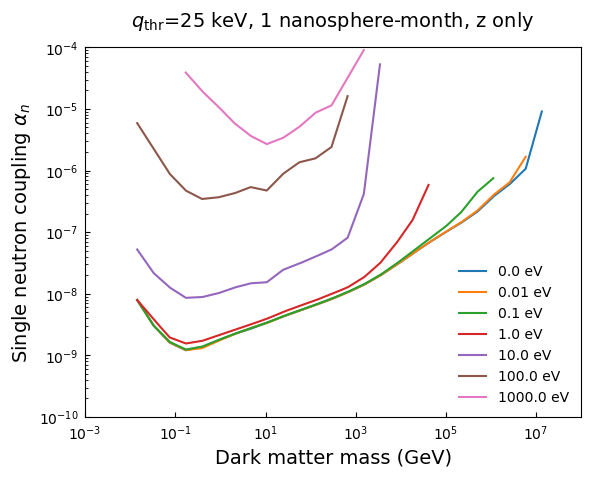

In [15]:
fig, ax = plt.subplots()

for i, lim in enumerate(alpha_lim):
    ax.loglog(mx_gev[i], lim, label=f'{mphi[i]} eV')

ax.set_ylim(1e-10, 1e-4)
ax.set_xlim(1e-3, 1e8)
ax.tick_params(axis='both', which='both', direction="in", pad=5)

ax.set_title(r'$q_{\mathrm{thr}}$=25 keV, 1 nanosphere-month, z only', fontsize=14, pad=15)
ax.legend(frameon=False, fontsize=10)
ax.set_xlabel('Dark matter mass (GeV)', fontsize=14)
ax.set_ylabel(r'Single neutron coupling $\alpha_n$', fontsize=14)

### Scalar mediator / nucleon coupling

To be specific, let's consider a scalar mediator coupled to nucleons in the effective Lagrangian
$$
  \mathcal{L} \subset - \frac{1}{2} y_\chi m_\chi \phi \chi^2 - y_n \phi \bar{n} n,
$$
**bearing in mind that force is attractive so our calculation is not technically correct.**

Convert limits on single neutron coupling to single *neucleon* coupling, let's call it $y_n$. Taking the $4 \pi$ in the Yukawa potential into account as well, we have

$$
  y_n = \frac{4 \pi \cdot \alpha_n}{2} = 2 \pi \cdot \alpha_n,
$$
where $\alpha_n$ is the single neutron coupling in the exclusion plot above and $y_n$ is the effective nucleon coupling in the Lagrangian.

In [18]:
yn_limit = alpha_lim * 4 * np.pi / 2

Text(0, 0.5, 'Effective neucleon coupling $y_n$')

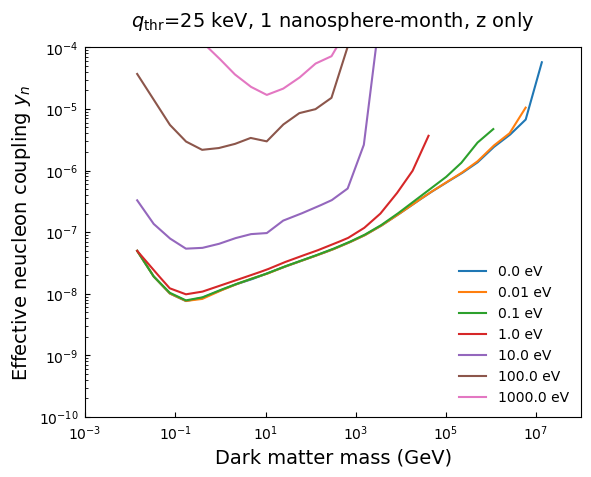

In [19]:
fig, ax = plt.subplots()

for i, lim in enumerate(yn_limit):
    ax.loglog(mx_gev[i], lim, label=f'{mphi[i]} eV')

ax.set_ylim(1e-10, 1e-4)
ax.set_xlim(1e-3, 1e8)
ax.tick_params(axis='both', which='both', direction="in", pad=5)

ax.set_title(r'$q_{\mathrm{thr}}$=25 keV, 1 nanosphere-month, z only', fontsize=14, pad=15)
ax.legend(frameon=False, fontsize=10)
ax.set_xlabel('Dark matter mass (GeV)', fontsize=14)
ax.set_ylabel(r'Effective neucleon coupling $y_n$', fontsize=14)

### Cross section

We will parametrize the direct detection cross section as
$$
    \sigma_n = \frac{y_n^2 y_\chi^2}{4 \pi} \frac{\mu_{\chi n}^2}{(m^2_\phi + v^2_{\text{DM}} m^2_\chi)^2}.
$$
There are astrophysical constraints on $y_\chi$ based on DM self-interaction so we can either choose it to be saturating the bound or just set $y_\chi$ to 1 when the bounds don't apply.

Here $\mu_{\chi n}$ is the DM-nucleon reduced mass, $v_{\text{DM}} m_\chi$ is the reference momentum transfer with $v_{\text{DM}} = 10^{-3}$.

In the composite DM paper the reference momentum transfer is $v_{\text{DM}} m_n$ where $m_n$ is the neutron mass - be careful about the parametrization.

#### *First try -* Let's set $y_\chi = 1$ and fix a mediator mass, and see what the constraints look like.

In [90]:
mphi

array([0.e+00, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

We can be slightly better than the fifth-force constraints for $m_\phi \sim 1000 \ \text{eV}$, but likely comparable or weaker to the neutron scattering bounds.

Text(0, 0.5, '$\\sigma_n \\ (\\mathrm{cm}^2$)')

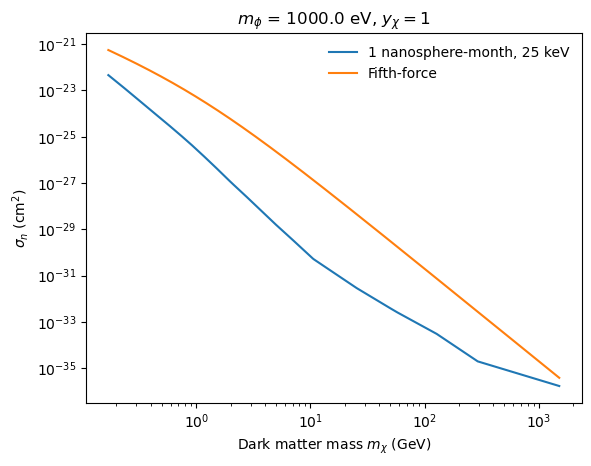

In [104]:
mx_plot = mx_gev[6] * 1e9
mphi_plot = mphi[6]

plt.loglog(mx_plot/1e9, get_sphere_sigma_n(mx_plot, mphi_plot, 'unity'), label='1 nanosphere-month, 25 keV')
plt.loglog(mx_plot/1e9, get_fifth_force_sigma_n(mx_plot, mphi_plot, 'unity'), label='Fifth-force')
plt.legend(frameon=False)

plt.title(f'$m_\phi$ = {mphi_plot} eV, $y_\chi = 1$')
plt.xlabel('Dark matter mass $m_\chi$ (GeV)')
plt.ylabel('$\sigma_n \ (\mathrm{cm}^2$)')

When the mediator is lighter than $m_\phi \sim 100 \ \text{eV}$, the nanospheres become less sensitive to existing fifth-force limits.

Text(0, 0.5, '$\\sigma_n \\ (\\mathrm{cm}^2$)')

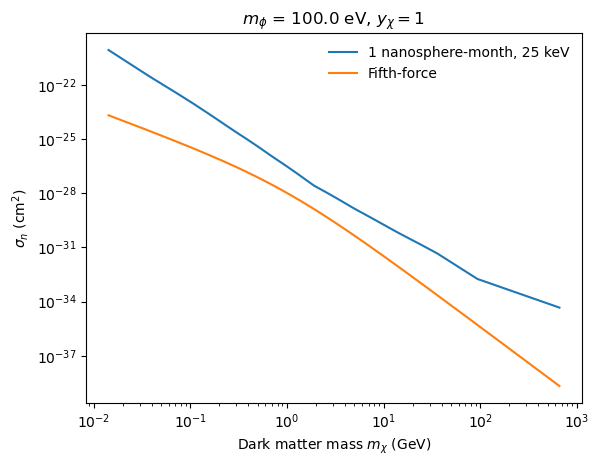

In [110]:
mx_plot = mx_gev[5] * 1e9
mphi_plot = mphi[5]

plt.loglog(mx_plot/1e9, get_sphere_sigma_n(mx_plot, mphi_plot, 'unity'), label='1 nanosphere-month, 25 keV')
plt.loglog(mx_plot/1e9, get_fifth_force_sigma_n(mx_plot, mphi_plot, 'unity'), label='Fifth-force')
plt.legend(frameon=False)

plt.title(f'$m_\phi$ = {mphi_plot} eV, $y_\chi = 1$')
plt.xlabel('Dark matter mass $m_\chi$ (GeV)')
plt.ylabel('$\sigma_n \ (\mathrm{cm}^2$)')

In [38]:
mphi

array([0.e+00, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [56]:
def cubic_log(x, y, x_pt):
    x_log = np.log10(x)
    y_log = np.log10(y)
    x_pt_log = np.log10(x_pt)
    
    cs = CubicSpline(x_log, y_log)
    return np.power( 10, cs(x_pt_log) )

In [73]:
def polyfit_log(x, y, x_pt, deg=4):
    x_log = np.log10(x)
    y_log = np.log10(y)
    x_pt_log = np.log10(x_pt)
    
    z = np.polyfit(x_log, y_log, deg)
    p = np.poly1d(z)
    return np.power( 10, p(x_pt_log) )

In [80]:
mx_ev  = mx_gev[1:] * 1e9 # Excluding the massless case
mx_min = mx_ev.min()

# Manually interpolate/extapolate the y_n limit in m_x and m_phi
mphi_interp = np.logspace(-2, 3, 10000)
mx_interp   = np.logspace(6, 16, 10000)

yn_interp_in_mx = np.empty((mx_ev.shape[0], mx_interp.size))

# First resample each y_n limit
yn_data = yn_limit[1:]
for i, yn in enumerate(yn_data):
    if i == 5:  # Manually deal with 1e3 mediator...
        yn_interp_in_mx[i] = polyfit_log(mx_ev[i], yn, mx_interp, deg=2)
    else:
        yn_interp_in_mx[i] = polyfit_log(mx_ev[i], yn, mx_interp, deg=4)
        
#     yn_interp_in_mx[i][ yn_interp_in_mx[i] > 1e-2 ] = np.nan
    
# mphi_grid, mx_grid = np.meshgrid(mphi_interp, mx_interp)

(1000000.0, 1e+16)

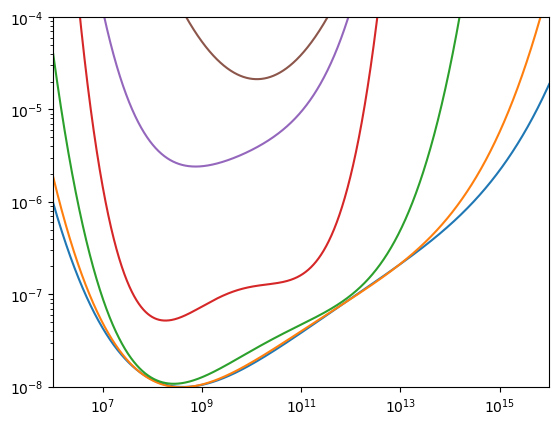

In [83]:
fig, ax = plt.subplots()

for i, lim in enumerate(yn_interp_in_mx):
    ax.loglog(mx_interp, lim, label=f'{mphi[1:][i]} eV')
    
ax.set_ylim(1e-8, 1e-4)
ax.set_xlim(1e6, 1e16)